# Experimento 3: Optimización del número de particiones.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [3]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times = execution_times[['App ID', 'Total app execution time (s)']]
execution_times = pd.merge(df_app_ids, execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

In [4]:
var_partitions = execution_times.loc[execution_times['App Name'].str.contains('var_partitions')]
var_partitions['Partitions'] = var_partitions['App Name'].map(lambda x: x.split('_')[3])
var_partitions = var_partitions.sort_values(by = ['App ID', 'Partitions'])

<ipython-input-4-a0928650dd1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_partitions['Partitions'] = var_partitions['App Name'].map(lambda x: x.split('_')[3])


In [5]:
example_1 = var_partitions.loc[var_partitions['Size percentage'] == 1]
example_2 = var_partitions.loc[var_partitions['Size percentage'] == 2]
example_3 = var_partitions.loc[var_partitions['Size percentage'] == 3]
example_7 = var_partitions.loc[var_partitions['Size percentage'] == 6]
example_8 = var_partitions.loc[var_partitions['Size percentage'] == 8]
example_9 = var_partitions.loc[var_partitions['Size percentage'] == 9]
example_10 = var_partitions.loc[var_partitions['Size percentage'] == 10]
example_11 = var_partitions.loc[var_partitions['Size percentage'] == 11]
example_12 = var_partitions.loc[var_partitions['Size percentage'] == 12]
example_81 = var_partitions.loc[var_partitions['Size percentage'] == 82]
example_82 = var_partitions.loc[var_partitions['Size percentage'] == 83]
example_83 = var_partitions.loc[var_partitions['Size percentage'] == 84]
example_84 = var_partitions.loc[var_partitions['Size percentage'] == 85]

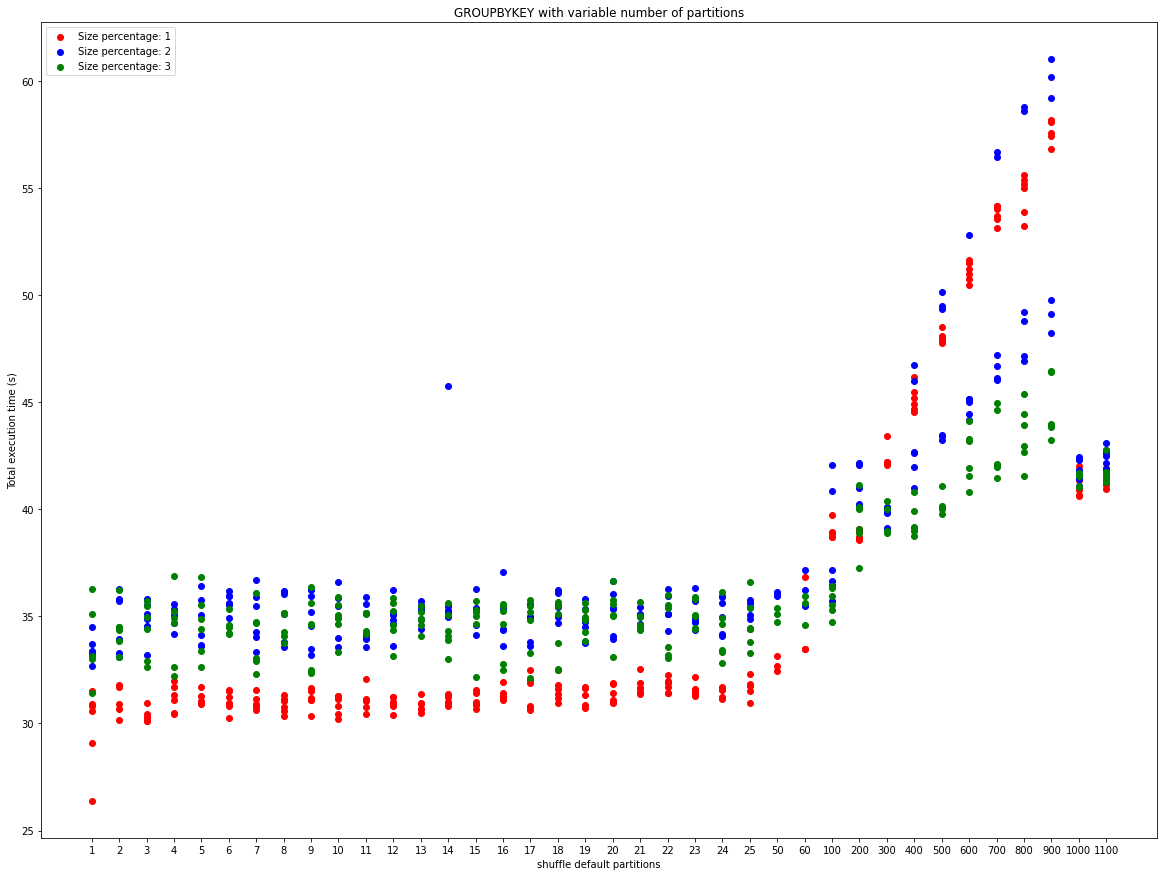

In [6]:
x_1 = example_1['Partitions']
y_1 = example_1['Total app execution time (s)']
x_2 = example_2['Partitions']
y_2 = example_2['Total app execution time (s)']
x_3 = example_3['Partitions']
y_3 = example_3['Total app execution time (s)']

plt.figure(figsize=(20,15))
plt.scatter(x_1, y_1, marker = 'o', color = 'red')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')
plt.scatter(x_3, y_3, marker = 'o', color = 'green')
plt.legend({'Size percentage: 1','Size percentage: 2', 'Size percentage: 3'})

# axis
plt.xlabel('shuffle default partitions')
plt.ylabel('Total execution time (s)')

# title
plt.title('GROUPBYKEY with variable number of partitions')

plt.show()

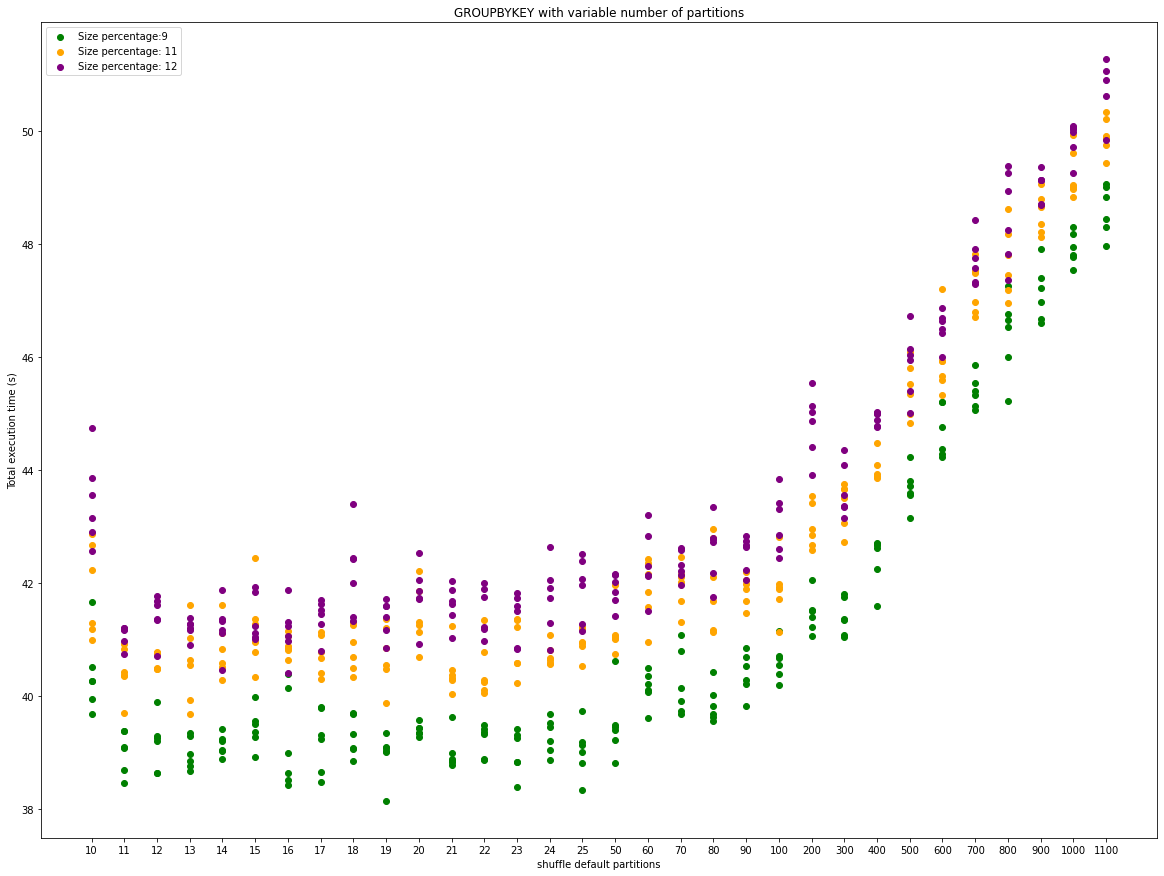

In [7]:
x_1 = example_9['Partitions']
y_1 = example_9['Total app execution time (s)']
x_2 = example_11['Partitions']
y_2 = example_11['Total app execution time (s)']
x_3 = example_12['Partitions']
y_3 = example_12['Total app execution time (s)']

plt.figure(figsize=(20,15))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'orange')
plt.scatter(x_3, y_3, marker = 'o', color = 'purple')
plt.legend({'Size percentage:9','Size percentage: 12', 'Size percentage: 11'})

# axis
plt.xlabel('shuffle default partitions')
plt.ylabel('Total execution time (s)')

# title
plt.title('GROUPBYKEY with variable number of partitions')

plt.show()

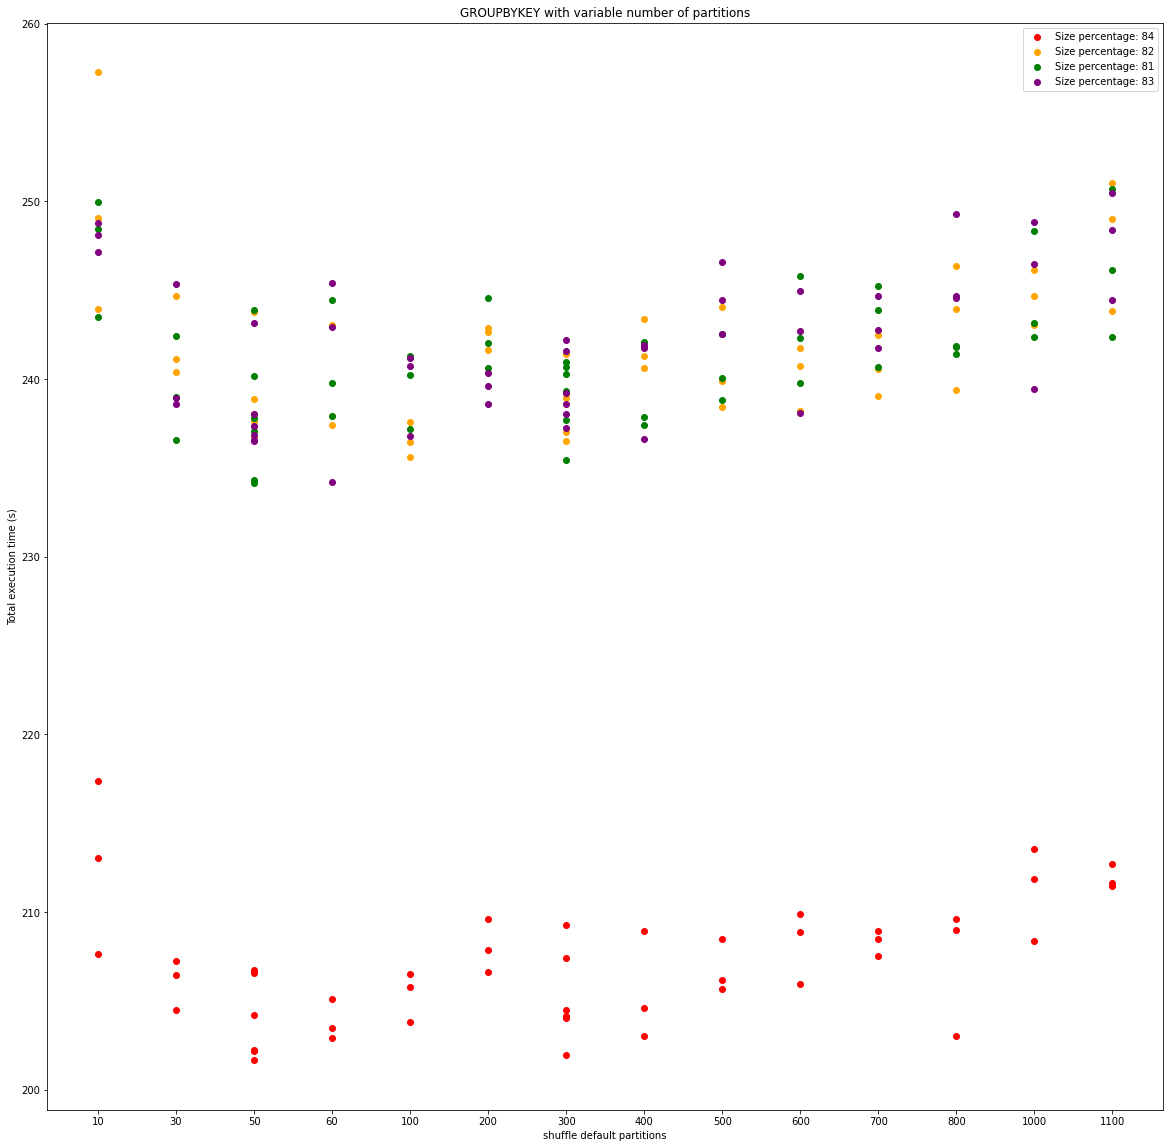

In [8]:
x_1 = example_81['Partitions']
y_1 = example_81['Total app execution time (s)']
x_2 = example_82['Partitions']
y_2 = example_82['Total app execution time (s)']
x_3 = example_83['Partitions']
y_3 = example_83['Total app execution time (s)']
x_4 = example_84['Partitions']
y_4 = example_84['Total app execution time (s)']

plt.figure(figsize=(20,20))
plt.scatter(x_1, y_1, marker = 'o', color = 'red')
plt.scatter(x_2, y_2, marker = 'o', color = 'orange')
plt.scatter(x_3, y_3, marker = 'o', color = 'green')
plt.scatter(x_4, y_4, marker = 'o', color = 'purple')
plt.legend({'Size percentage: 81','Size percentage: 82', 'Size percentage: 83', 'Size percentage: 84'})

# axis
plt.xlabel('shuffle default partitions')
plt.ylabel('Total execution time (s)')

# title
plt.title('GROUPBYKEY with variable number of partitions')

plt.show()

In [9]:
example_higher = var_partitions.groupby(['Size percentage', 'Partitions']).agg({'Total app execution time (s)': lambda x: list(x)}).reset_index(drop = False)
example_higher['Mean execution time (s)'] = example_higher['Total app execution time (s)'].map(lambda x: sum(x)/len(x))
example_higher['Partitions'] = example_higher['Partitions'].astype(int)
example_higher = example_higher.sort_values(by = ['Size percentage','Partitions']).drop(columns = ['Total app execution time (s)'])
example_higher

,Size percentage,Partitions,Mean execution time (s)
0,1,1,29.882667
14,1,2,31.166500
22,1,3,30.339667
24,1,4,31.169667
26,1,5,31.149667
...,...,...,...
334,88,200,250.335667
335,88,300,243.989167
336,88,400,245.315833
337,88,500,247.034333


In [10]:
minimums = example_higher.groupby(['Size percentage']).agg({'Mean execution time (s)': lambda x: min(x)}).reset_index(drop = False)
minimums = pd.merge(minimums, example_higher, how = "left").rename(columns = {'Mean execution time (s)': 'Minimun execution time (s)', 'Partitions': 'Optimal number of partitions'})
minimums

,Size percentage,Minimun execution time (s),Optimal number of partitions
0,1,29.882667,1
1,2,33.463000,1
2,3,33.677167,1
3,8,33.878833,11
4,9,38.955167,19
5,11,40.431333,11
6,12,41.081500,11
7,81,200.383667,30
8,82,203.837333,60
9,83,236.576000,100


In [11]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')]
group_by = group_by.loc[group_by['App Name'].str.startswith('groupByKey')].groupby(['App ID', 'App Name'])
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])
execution_times['Type'] = execution_times['App Name'].map(lambda x: x.split('_')[1])
execution_times = execution_times.drop(columns = ['Datetime', 'Start', 'End'])
# ---------------------------------------
partitions = df.loc[(df['Total Tasks'] != '-') & (df['Total Tasks'] != "1")]
partitions['Total Tasks'] = partitions['Total Tasks'].astype(int)
partitions = partitions.loc[partitions['App Name'].str.startswith('groupByKey')].sort_values(by = ['App ID', 'Total Tasks'])
partitions = partitions.groupby(['App ID', 'App Name']).agg({'Total Tasks': lambda x: max(x)}).reset_index(drop = False)
partitions['Size percentage'] = partitions['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3])).astype(int)
partitions = partitions[['App ID', 'App Name', 'Total Tasks']].rename(columns = {'Total Tasks': 'Partitions'})

<ipython-input-11-1768802a759a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partitions['Total Tasks'] = partitions['Total Tasks'].astype(int)


In [12]:
experiment_sample = execution_times.loc[execution_times['Type'] == 'var']['Size percentage'].drop_duplicates().values
execution_times['keep'] = execution_times['Size percentage'].map(lambda x: x in experiment_sample)
execution_times = execution_times.loc[execution_times['keep']].drop(columns = 'keep')
complete = pd.merge(execution_times, partitions)

In [13]:
medias = complete.groupby(['Size percentage', 'Partitions', 'Type', 'Transformation']).agg({'Total app execution time (s)': lambda x: list(x)}).reset_index(drop = False)
medias['Mean execution time (s)'] = medias['Total app execution time (s)'].map(lambda x: sum(x)/len(x))
medias['Partitions'] = medias['Partitions'].astype(int)
medias = medias.sort_values(by = ['Size percentage','Partitions']).drop(columns = ['Total app execution time (s)'])
medias

,Size percentage,Partitions,Type,Transformation,Mean execution time (s)
0,1,3,app,groupByKey,22.526000
1,1,3,var,groupByKey,30.462944
2,1,4,var,groupByKey,31.169667
3,1,5,var,groupByKey,31.149667
4,1,6,var,groupByKey,31.049333
...,...,...,...,...,...
236,88,304,app,groupByKey,331.692000
237,88,304,var,groupByKey,246.104667
238,88,400,var,groupByKey,245.315833
239,88,500,var,groupByKey,247.034333


In [14]:
minimum = medias.groupby('Size percentage').agg({'Mean execution time (s)': lambda x: min(x)}).reset_index(drop = False).rename(columns = {'Mean execution time (s)': 'Minimun execution time (s)'})
compare = pd.merge(medias, minimum, how = "right")
minimum_compare = compare.loc[compare['Mean execution time (s)'] == compare['Minimun execution time (s)']]
minimum_compare.drop(columns = 'Minimun execution time (s)')
default = medias.loc[medias['Type'] == 'app'].rename(columns = {'Mean execution time (s)': 'Default Spark execution time (s)', 'Partitions': 'Default Spark Partitions'}).reset_index(drop = True)
default = default.drop(columns = 'Type')
final = pd.merge(minimum_compare, default)
final = final.loc[final['Size percentage']>=80].drop(columns = ['Type', 'Mean execution time (s)'])
final = final.rename( columns = {'Partitions': 'Set up partitions', 'Minimun execution time (s)': 'Variable partitions execution time (s)'})
final = final[['Transformation','Size percentage', 'Default Spark Partitions', 'Default Spark execution time (s)', 'Set up partitions', 'Variable partitions execution time (s)']]
final['Improvement (s)'] = final['Default Spark execution time (s)'] - final['Variable partitions execution time (s)']
final['Improvement %'] = (final['Default Spark execution time (s)']/final['Variable partitions execution time (s)']-1)*100
final.reset_index(drop = True)

,Transformation,Size percentage,Default Spark Partitions,Default Spark execution time (s),Set up partitions,Variable partitions execution time (s),Improvement (s),Improvement %
0,groupByKey,81,246,268.835,300,203.100500,65.734500,32.365504
1,groupByKey,82,249,272.919,300,205.225167,67.693833,32.985152
2,groupByKey,83,304,323.846,600,240.248333,83.597667,34.796357
3,groupByKey,84,304,324.100,400,239.124000,84.976000,35.536374
4,groupByKey,85,304,323.085,400,240.094000,82.991000,34.566045
5,groupByKey,86,304,324.328,400,239.197000,85.131000,35.590329
6,groupByKey,87,304,320.452,600,240.158667,80.293333,33.433452
7,groupByKey,88,304,331.692,400,245.315833,86.376167,35.210188
